In [1]:
## libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
print("libraries imported")

libraries imported


In [2]:
## load the csv
df = pd.read_csv('D:/AWR/data/awr_metrics.csv')

## converts start_time and end_time in datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.dayofweek
df['start_month'] = df['start_time'].dt.month
df['is_weekend'] = df['start_time'].dt.dayofweek >= 5

# Encode Hour of Day (Cycle Length = 24)
df['hour_sin'] = np.sin(2 * np.pi * df['start_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['start_hour'] / 24)

# Encode Day of Week (Cycle Length = 7)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

# Encode Day of Week (Cycle Length = 7)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df = df.drop(columns=['start_time', 'end_time', 'start_hour', 'day_of_week', 'start_month'])

In [3]:
## basic info of dataset
def dataset_overview(data):
    print('============================================================')
    print("First 5 rows of dataset:\n")
    display(df.head())
    print('============================================================')
    print("basic info of dataset:\n")
    df.info()
    print('============================================================')
    print("missing values in dataset:\n", df.isnull().sum())
    print('============================================================')
    print("duplicated values:\n", df.duplicated().sum())
    print('============================================================')
    print("descriptive statistics:\n", df.describe())

dataset_overview(data=df)
    

First 5 rows of dataset:



,filename,db_name,db_id,instance,elapsed_min,db_time_min,anomaly_type,db_time_per_sec,db_cpu_per_sec,redo_size_per_sec,...,load_average,physical_memory_gb,num_cpus,cpu_pct_of_db_time,physical_to_logical_ratio,is_weekend,hour_sin,hour_cos,day_sin,day_cos
0,AWR_CPU_SPIKE_0033.html,PROD_CRM_136,2261879692,3,60.0,159.6,CPU_SPIKE,2.66,1.62,230994.0,...,8.1,16.0,4.0,60.902256,0.094139,False,-0.5,-0.866025,0.000000,1.000000
1,AWR_CPU_SPIKE_0048.html,PROD_ANALYTICS_882,9510192174,2,60.0,122.4,CPU_SPIKE,2.04,2.33,224255.0,...,8.2,16.0,4.0,114.215686,0.080000,False,-0.5,-0.866025,0.974928,-0.222521
2,AWR_CPU_SPIKE_0064.html,PROD_HR_885,4923746166,2,60.0,144.6,CPU_SPIKE,2.41,2.38,290199.0,...,6.6,16.0,8.0,98.755187,0.042674,False,-0.5,-0.866025,0.974928,-0.222521
3,AWR_CPU_SPIKE_0077.html,PROD_ERP_374,1458799458,3,60.0,125.4,CPU_SPIKE,2.09,1.63,231342.0,...,9.7,16.0,8.0,77.990431,0.047852,True,-0.5,-0.866025,-0.974928,-0.222521
4,AWR_CPU_SPIKE_0127.html,PROD_ANALYTICS_565,4854990138,2,60.0,123.0,CPU_SPIKE,2.05,1.80,288420.0,...,11.4,16.0,8.0,87.804878,0.036070,False,-0.5,-0.866025,0.974928,-0.222521


basic info of dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   filename                   300 non-null    object 
 1   db_name                    300 non-null    object 
 2   db_id                      300 non-null    int64  
 3   instance                   300 non-null    int64  
 4   elapsed_min                300 non-null    float64
 5   db_time_min                300 non-null    float64
 6   anomaly_type               300 non-null    object 
 7   db_time_per_sec            300 non-null    float64
 8   db_cpu_per_sec             300 non-null    float64
 9   redo_size_per_sec          300 non-null    float64
 10  logical_reads_per_sec      300 non-null    float64
 11  physical_reads_per_sec     300 non-null    float64
 12  executes_per_sec           300 non-null    float64
 13  transactions_per_sec      

#### findings

1. There are 300 reports
2. Each report has 43 features
3. There are no missing values
4. All data types looks correct.
5. There are no duplicate values

anomaly_type
NORMAL             240
LOCK_CONTENTION     14
TEMP_SPACE          13
IO_BOTTLENECK       10
CPU_SPIKE           10
MEMORY_PRESSURE      7
NETWORK_LATENCY      6
Name: count, dtype: int64


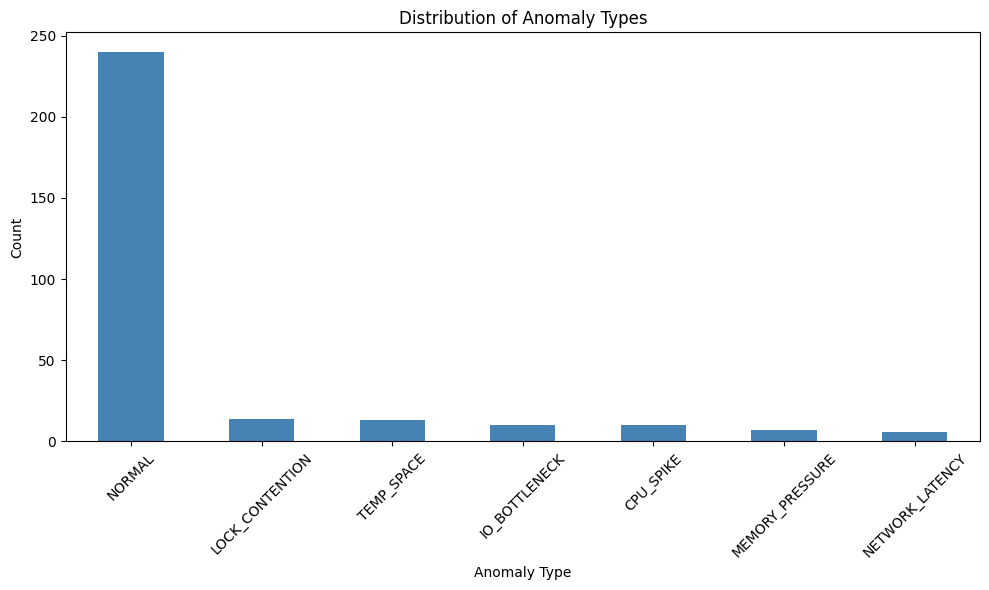

In [4]:
# Count each anomaly type
print(df['anomaly_type'].value_counts())

# Visualize it
plt.figure(figsize=(10, 6))
df['anomaly_type'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Anomaly Types')
plt.xlabel('Anomaly Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Anomaly distribution

1. There are 6 anomalies. 
2. Classes seems to be imbalanced, since there are 240 normal reports and 60 anomaly reports.
3. Need to handle class imbalance using techniques like SMOTE, class weights, or stratified sampling
3. Most common is "Normal" and least common is "Network Latency"
4. count per anomaly type - 

|   Anomaly         |  count   |
|---|---|
|   NORMAL          |   240    |  
|   LOCK_CONTENTION |    14    |
|   TEMP_SPACE      |    13    |
|   IO_BOTTLENECK   |    10    |
|   CPU_SPIKE       |    10    |
|   MEMORY_PRESSURE |     7    |
|   NETWORK_LATENCY |     6    |

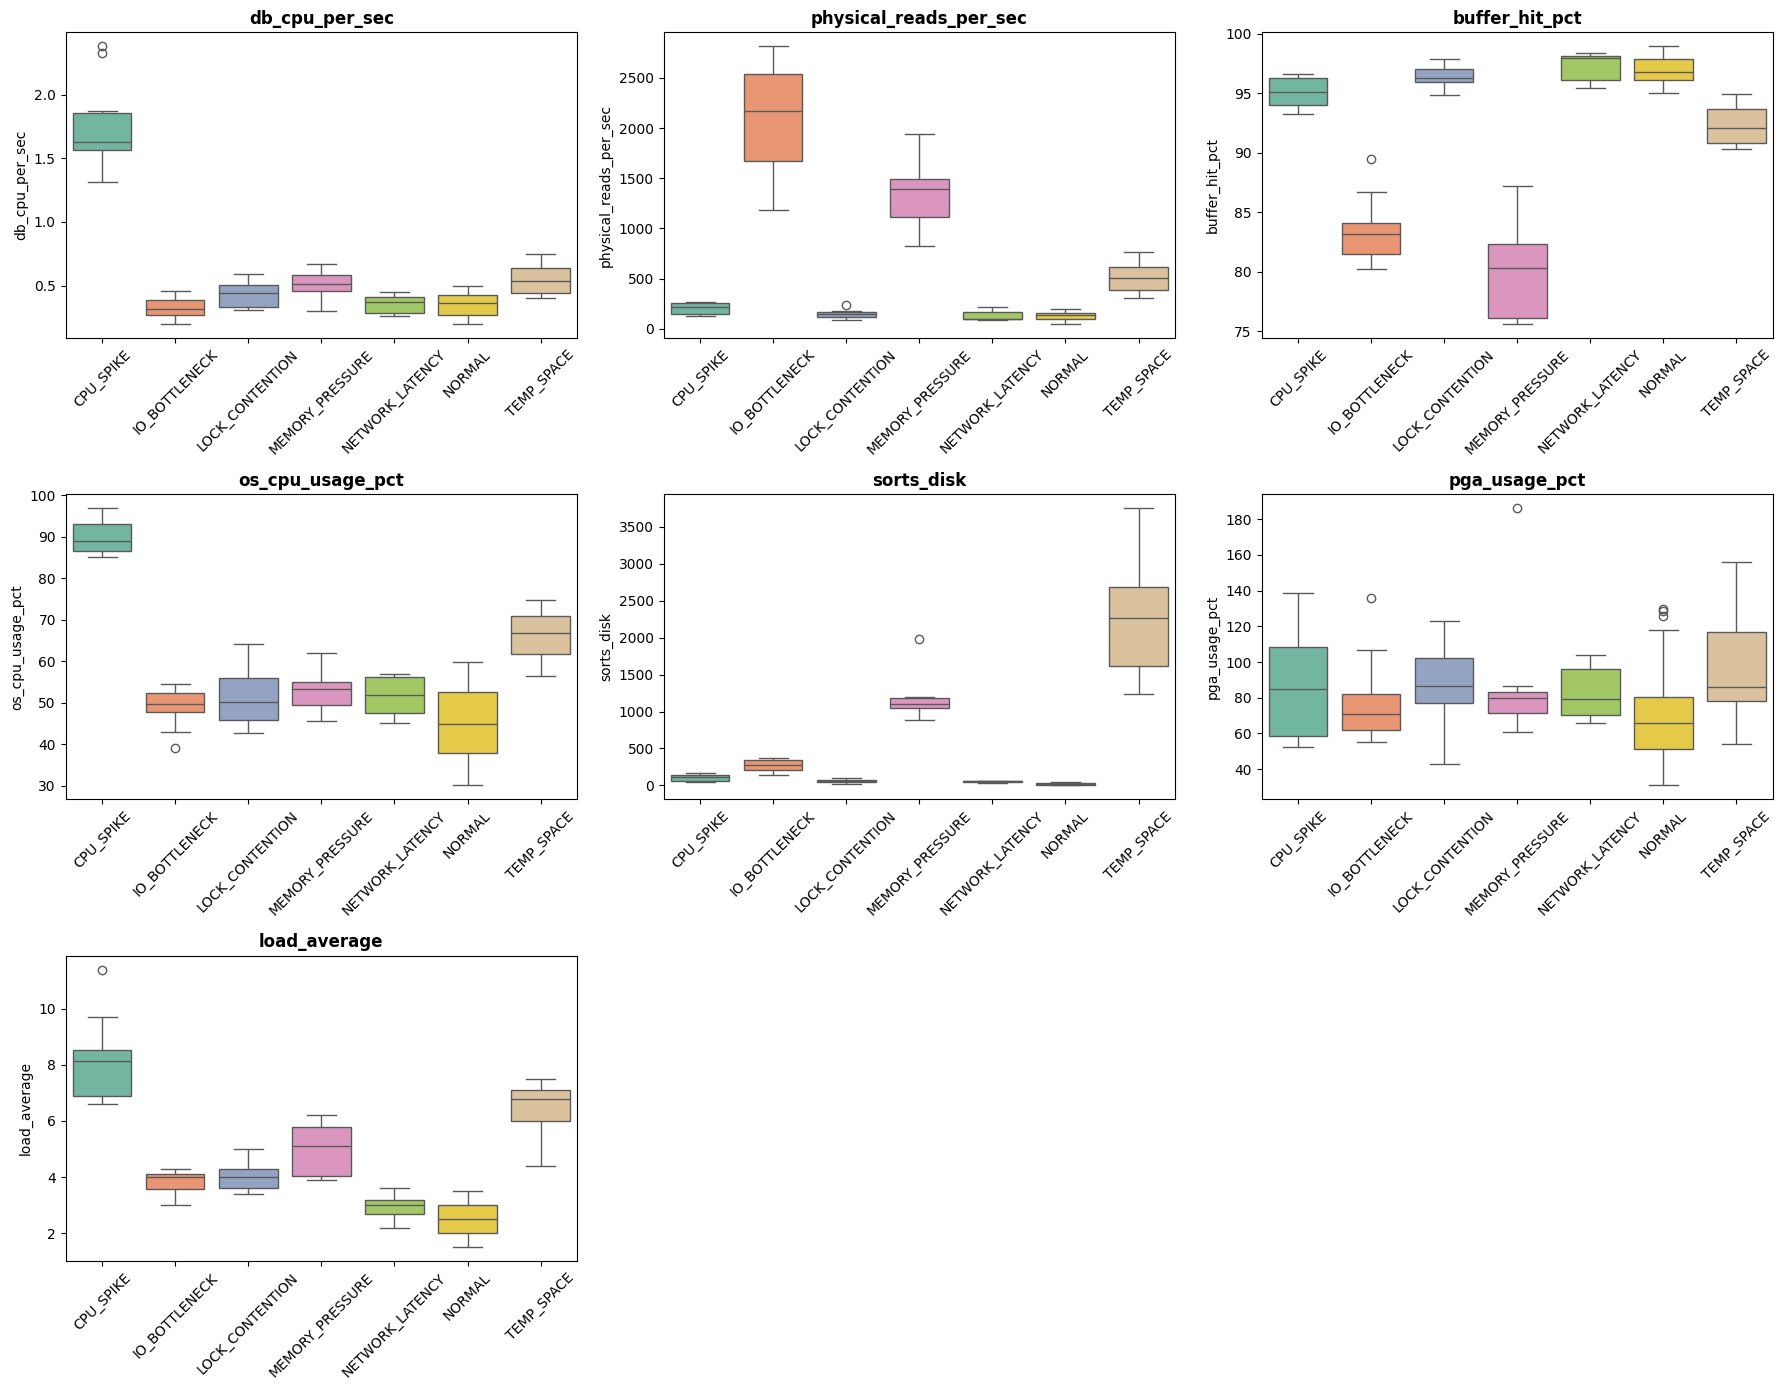

In [5]:
## compare key metrics across anomaly types
# Select key metrics for comparison
key_metrics = [
    'db_cpu_per_sec', 'physical_reads_per_sec', 'buffer_hit_pct',
    'os_cpu_usage_pct', 'sorts_disk', 'pga_usage_pct', 'load_average'
]

# Create boxplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, metric in enumerate(key_metrics):
    sns.boxplot(data=df, x='anomaly_type', y=metric, ax=axes[idx], palette='Set2', hue='anomaly_type', legend=False)
    axes[idx].set_title(f'{metric}', fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove extra subplots
for idx in range(len(key_metrics), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


#### Metrics which best separate anomalies are:

1. db_cpu_per_sec --> cpu spikes shows the difference
2. physical_reads_per_sec --> IO bottlenecks and memory pressure are high comparative to others
3. sorts_disk --> temp space shows significantly high

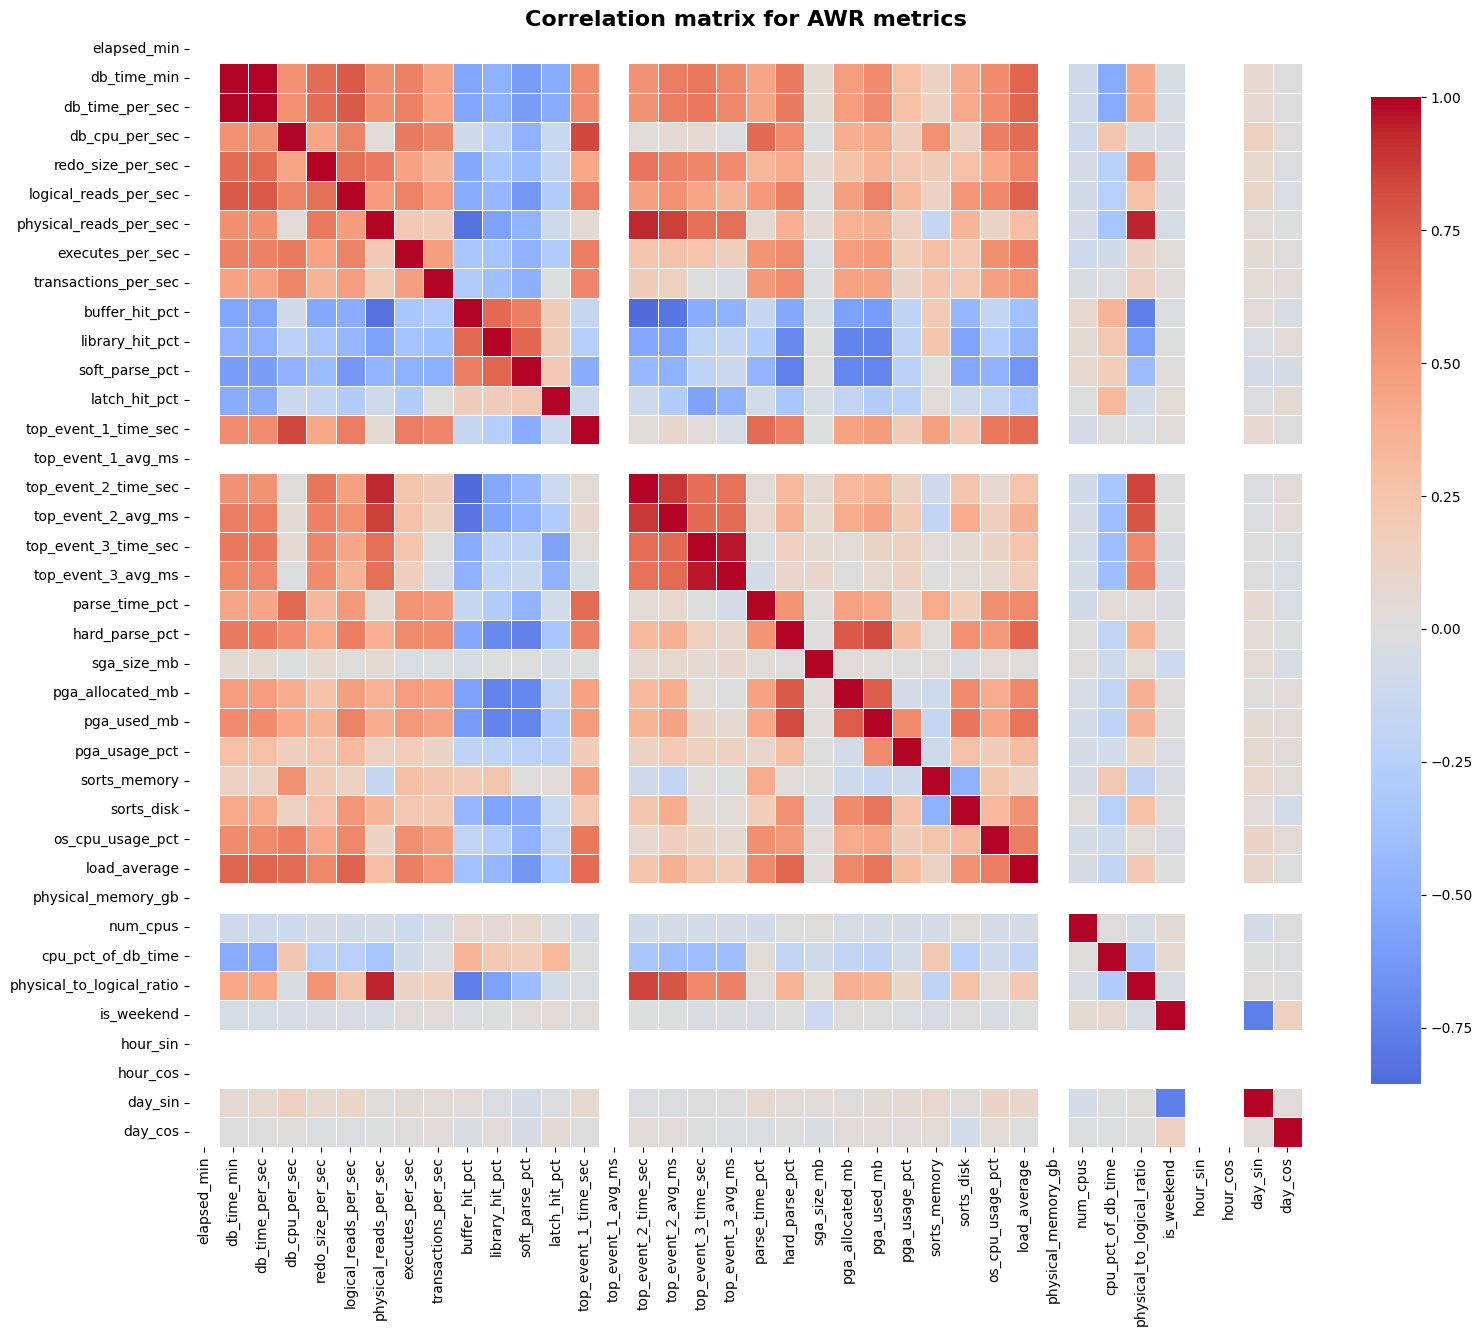

In [6]:
## correlation analysis
### numeric columns
numeric_cols = [col for col in df.columns if df[col].dtypes != 'O']

### remove non-numeric columns
numeric_cols = [col for col in numeric_cols if col not in ['db_id','instance']]

## correlation
correlation_matrix = df[numeric_cols].corr()

## plot heatmap
plt.figure(figsize=(16,14))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title('Correlation matrix for AWR metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

print("Highly correlated features (>0.8):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

Highly correlated features (>0.8):
db_time_min <-> db_time_per_sec: 1.000
db_cpu_per_sec <-> top_event_1_time_sec: 0.834
physical_reads_per_sec <-> buffer_hit_pct: -0.824
physical_reads_per_sec <-> top_event_2_time_sec: 0.931
physical_reads_per_sec <-> top_event_2_avg_ms: 0.856
physical_reads_per_sec <-> physical_to_logical_ratio: 0.941
buffer_hit_pct <-> top_event_2_time_sec: -0.856
buffer_hit_pct <-> top_event_2_avg_ms: -0.811
top_event_2_time_sec <-> top_event_2_avg_ms: 0.878
top_event_2_time_sec <-> physical_to_logical_ratio: 0.845
top_event_3_time_sec <-> top_event_3_avg_ms: 0.958
hard_parse_pct <-> pga_used_mb: 0.822


From the above correlation analysis, we can use one of the feature from highly correlated features.

we can keep below features -
db_time_per_sec, db_cpu_per_sec, physical_reads_per_sec, top_event_3_time_sec, pga_used_mb, buffer_hit_pct

we can drop below features -
db_time_min, top_event_1_time_sec, top_event_2_time_sec, top_event_2_avg_ms, physical_to_logical_ratio

In [8]:
# Compare NORMAL vs each anomaly type for specific metrics
anomaly_types = df['anomaly_type'].unique()

for anomaly in anomaly_types:
    if anomaly != 'NORMAL':
        print(f"\n{'='*60}")
        print(f"Comparing NORMAL vs {anomaly}")
        print('='*60)
        
        normal_data = df[df['anomaly_type'] == 'NORMAL'][key_metrics].mean()
        anomaly_data = df[df['anomaly_type'] == anomaly][key_metrics].mean()
        
        comparison = pd.DataFrame({
            'NORMAL': normal_data,
            anomaly: anomaly_data,
            'Difference': anomaly_data - normal_data,
            'Pct_Change': ((anomaly_data - normal_data) / normal_data * 100)
        })
        
        print(comparison.round(2))


Comparing NORMAL vs CPU_SPIKE
                        NORMAL  CPU_SPIKE  Difference  Pct_Change
db_cpu_per_sec            0.35       1.74        1.39      390.43
physical_reads_per_sec  127.92     205.10       77.18       60.34
buffer_hit_pct           96.93      95.09       -1.85       -1.90
os_cpu_usage_pct         45.11      90.00       44.89       99.51
sorts_disk               25.18     105.70       80.53      319.86
pga_usage_pct            67.69      85.81       18.12       26.77
load_average              2.49       8.17        5.68      227.62

Comparing NORMAL vs IO_BOTTLENECK
                        NORMAL  IO_BOTTLENECK  Difference  Pct_Change
db_cpu_per_sec            0.35           0.33       -0.03       -7.83
physical_reads_per_sec  127.92        2095.30     1967.38     1538.02
buffer_hit_pct           96.93          83.48      -13.45      -13.88
os_cpu_usage_pct         45.11          49.03        3.92        8.69
sorts_disk               25.18         268.90      243.7

**Comparing NORMAL vs CPU_SPIKE**

- db_cpu_per_sec, sorts_disk, load_average shows high percentage change

**Comparing NORMAL vs IO_BOTTLENECK**

- physical_reads_per_sec, sorts_disk shows high percentage change

**Comparing NORMAL vs LOCK_CONTENTION**

- sorts_disk shows high percentage change

**Comparing NORMAL vs MEMORY_PRESSURE**

- physical_reads_per_sec, sorts_disk shows high percentage change

**Comparing NORMAL vs NETWORK_LATENCY**

- sorts_disk shows high percentage change

**Comparing NORMAL vs TEMP_SPACE**

- physical_reads_per_sec, sorts_disk, load_average shows high percentage change


- `sorts_disk` is a strong universal anomaly indicator across all types

- Each anomaly type has 2-3 signature metrics that distinguish it

In [9]:
df.columns

Index(['filename', 'db_name', 'db_id', 'instance', 'elapsed_min',
       'db_time_min', 'anomaly_type', 'db_time_per_sec', 'db_cpu_per_sec',
       'redo_size_per_sec', 'logical_reads_per_sec', 'physical_reads_per_sec',
       'executes_per_sec', 'transactions_per_sec', 'buffer_hit_pct',
       'library_hit_pct', 'soft_parse_pct', 'latch_hit_pct',
       'top_event_1_name', 'top_event_1_time_sec', 'top_event_1_avg_ms',
       'top_event_2_name', 'top_event_2_time_sec', 'top_event_2_avg_ms',
       'top_event_3_name', 'top_event_3_time_sec', 'top_event_3_avg_ms',
       'parse_time_pct', 'hard_parse_pct', 'sga_size_mb', 'pga_allocated_mb',
       'pga_used_mb', 'pga_usage_pct', 'sorts_memory', 'sorts_disk',
       'os_cpu_usage_pct', 'load_average', 'physical_memory_gb', 'num_cpus',
       'cpu_pct_of_db_time', 'physical_to_logical_ratio', 'is_weekend',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos'],
      dtype='object')

In [10]:
df['top_event_1_name'].value_counts()

top_event_1_name
CPU time    300
Name: count, dtype: int64

In [11]:
df['top_event_2_name'].value_counts()

top_event_2_name
db file sequential read    300
Name: count, dtype: int64

In [12]:
df['top_event_3_name'].value_counts()

top_event_3_name
log file sync    300
Name: count, dtype: int64

* Text features (filename, db_name, start_time, end_time, top_event_*_name) will be dropped before modeling

In [13]:
[col for col in df.columns if df[col].dtypes == 'O']

['filename',
 'db_name',
 'anomaly_type',
 'top_event_1_name',
 'top_event_2_name',
 'top_event_3_name']

In [16]:
df['is_weekend'].astype('int')

0      0
1      0
2      0
3      1
4      0
      ..
295    0
296    0
297    1
298    1
299    1
Name: is_weekend, Length: 300, dtype: int64

In [18]:
df['is_normal'] = np.where(
    df['anomaly_type'] == 'NORMAL',
    1, 0
)

print("Original Anomaly Counts:")
print(df['anomaly_type'].value_counts())
print("\nNew 'is_normal' Feature Counts:")
print(df['is_normal'].value_counts())

Original Anomaly Counts:
anomaly_type
NORMAL             240
LOCK_CONTENTION     14
TEMP_SPACE          13
IO_BOTTLENECK       10
CPU_SPIKE           10
MEMORY_PRESSURE      7
NETWORK_LATENCY      6
Name: count, dtype: int64

New 'is_normal' Feature Counts:
is_normal
1    240
0     60
Name: count, dtype: int64
